In [1]:
'''CO :
GOOD : Ihigh=2 Ilow=0 ||(ppm) Chigh=9.4 Clow= 0 
Moderate : Ihigh=17 Ilow=2.1 ||(ppm) Chigh= 15.4 Clow= 9.5
Poor : Ihigh=>34 Ilow=17 ||(ppm) Chigh=50.4 Clow= 15.5

OZONE :
GOOD : Ihigh=100 Ilow=0 ||(ppb) Chigh=70 Clow= 0
Moderate : Ihigh=208 Ilow=101 || Chigh=105 Clow= 71
Poor : Ihigh=>748 Ilow=209 || Chigh=200 Clow= 106 

NO2 : 
GOOD : Ihigh=80 Ilow=0 ||(ppb) Chigh=100 Clow= 0
Moderate : Ihigh=280 Ilow=81 || Chigh=649 Clow= 101
Poor : Ihigh=>400 Ilow=281 || Chigh=2049 Clow= 650

SO2 :
GOOD : Ihigh=80 Ilow=0 ||(ppb) Chigh=75 Clow= 0
Moderate : Ihigh=800 Ilow=81 || Chigh=304 Clow= 76
Poor : Ihigh=>1600 Ilow=801 || Chigh=1004 Clow= 305

PM2.5 :
GOOD : Ihigh=60 Ilow=0 || Chigh=35.4 Clow=0 
Moderate : Ihigh=120 Ilow=61 || Chigh=150.4 Clow= 35.5
Poor : Ihigh=>250 Ilow=121 || Chigh=500.4 Clow= 150.5'''

'CO :\nGOOD : Ihigh=2 Ilow=0 ||(ppm) Chigh=9.4 Clow= 0 \nModerate : Ihigh=17 Ilow=2.1 ||(ppm) Chigh= 15.4 Clow= 9.5\nPoor : Ihigh=>34 Ilow=17 ||(ppm) Chigh=50.4 Clow= 15.5\n\nOZONE :\nGOOD : Ihigh=100 Ilow=0 ||(ppb) Chigh=70 Clow= 0\nModerate : Ihigh=208 Ilow=101 || Chigh=105 Clow= 71\nPoor : Ihigh=>748 Ilow=209 || Chigh=200 Clow= 106 \n\nNO2 : \nGOOD : Ihigh=80 Ilow=0 ||(ppb) Chigh=100 Clow= 0\nModerate : Ihigh=280 Ilow=81 || Chigh=649 Clow= 101\nPoor : Ihigh=>400 Ilow=281 || Chigh=2049 Clow= 650\n\nSO2 :\nGOOD : Ihigh=80 Ilow=0 ||(ppb) Chigh=75 Clow= 0\nModerate : Ihigh=800 Ilow=81 || Chigh=304 Clow= 76\nPoor : Ihigh=>1600 Ilow=801 || Chigh=1004 Clow= 305\n\nPM2.5 :\nGOOD : Ihigh=60 Ilow=0 || Chigh=35.4 Clow=0 \nModerate : Ihigh=120 Ilow=61 || Chigh=150.4 Clow= 35.5\nPoor : Ihigh=>250 Ilow=121 || Chigh=500.4 Clow= 150.5'

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


data=pd.read_csv("C:\\Users\\noopur\\Desktop\\MiniProject\\chennai data\\2015.csv")

#Train Test split
from sklearn.cross_validation import train_test_split

#Feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

#Import Machine learning libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#Accuracy checking
from sklearn.metrics import confusion_matrix

In [19]:
data.head()

,DAY_NUMBER,MONTH,MONTH_NUM,DATE1,CO,OZONE,NO2,SO2,PM2.5,Temp
0,1,JAN,1,2015-01-01 00:00,30.19,18.88,25.89,12.38,102.95,26.61
1,2,JAN,1,2015-01-02 00:00,38.10,15.08,15.63,9.89,102.95,49.85
2,3,JAN,1,2015-01-03 00:00,0.01,21.66,29.23,217.20,102.95,84.76
3,4,JAN,1,2015-01-04 00:00,0.06,15.30,28.98,341.69,102.95,82.17
4,5,JAN,1,2015-01-05 00:00,0.02,15.55,28.51,333.36,102.95,82.09


In [20]:
data.shape

(731, 10)

In [24]:
df=data.fillna(data.mean())

In [25]:
df

,DAY_NUMBER,MONTH,MONTH_NUM,DATE1,CO,OZONE,NO2,SO2,PM2.5,Temp
0,1,JAN,1,2015-01-01 00:00,30.19,18.88,25.89,12.38,102.95,26.61000
1,2,JAN,1,2015-01-02 00:00,38.10,15.08,15.63,9.89,102.95,49.85000
2,3,JAN,1,2015-01-03 00:00,0.01,21.66,29.23,217.20,102.95,84.76000
3,4,JAN,1,2015-01-04 00:00,0.06,15.30,28.98,341.69,102.95,82.17000
4,5,JAN,1,2015-01-05 00:00,0.02,15.55,28.51,333.36,102.95,82.09000
5,6,JAN,1,2015-01-06 00:00,0.02,21.03,169.63,265.09,102.95,80.83000
6,7,JAN,1,2015-01-07 00:00,0.02,24.11,114.65,267.92,102.95,82.41000
7,8,JAN,1,2015-01-08 00:00,0.02,35.74,105.13,519.10,102.95,79.92000
8,9,JAN,1,2015-01-09 00:00,0.22,61.00,98.65,285.59,102.95,77.35000
9,10,JAN,1,2015-01-10 00:00,0.01,36.44,31.49,339.24,102.95,61.68000


In [27]:
class data_cleaning:
        def load_aqi(self,parameter):
            COaqi=[]
            NO2aqi=[]
            SO2aqi=[]
            PM2aqi=[]
            Ozoneaqi=[]
            
            if parameter=='CO':
                for idx, val in df['CO'].iteritems():
                    if val>= 0 and val <=2.0:
                        I=(50)*(val)
                    elif val>2.0 and val <=17:
                        I=(((199)/(14.9))*(val-2.1))+101
                    elif val>=18 and val <=34:
                        I=(((199)/(17))*(val-17))+301
                    COaqi.append(I)
                df["COAqi"]=pd.Series(COaqi)
                    
            if parameter=='Ozone':
                for idx,val in df['OZONE'].iteritems():
                    if val>=0 and val <=100:
                        I=(((100-0)/(100-0))*(val-0))+0
                    elif val>=101 and val <=208:
                        I=(((300-101)/(208-101))*(val-101))+101
                    elif val>=209 and val <=748:
                        I=(((500-301)/(34-17))*(val-209))+301
                    Ozoneaqi.append(I)
                df['OzoneAqi']=pd.Series(Ozoneaqi)
#                print(data)
            
                    
            if parameter=='NO2':
                for idx,val in df['NO2'].iteritems():
                    if val>=0 and val <=80:
                        I=(((100-0)/(80-0))*(val-0))+0
                    elif val>=81 and val <=280:
                        I=(((300-101)/(280-81))*(val-81))+101
                    elif val>=281 and val <=400:
                        I=(((500-301)/(400-281))*(val-281))+301
                    NO2aqi.append(I)
                df["NO2Aqi"]=pd.Series(NO2aqi)
                    
            if parameter=='SO2':
                for idx,val in df['SO2'].iteritems():
                    if val>=0 and val <=80:
                        I=(((100-0)/(80-0))*(val-0))+0
                    elif val>=81 and val <=800:
                        I=(((300-101)/(800-81))*(val-81))+101
                    elif val>=801 and val <=1600:
                        I=(((500-301)/(1600-801))*(val-801))+301
                    SO2aqi.append(I)
                df["SO2Aqi"]=pd.Series(SO2aqi)

            if parameter=='PM2.5':
                for idx,val in df['PM2.5'].iteritems():
                    if val>=0 and val <=100:
                        I=(((100-0)/(100-0))*(val-0))+0
                    elif val>=101 and val <=350:
                        I=(((300-101)/(350-101))*(val-101))+101
                    elif val>=351 and val <=430:
                        I=(((500-301)/(430-351))*(val-351))+301
                    PM2aqi.append(I)
                df["PM2.5Aqi"]=pd.Series(PM2aqi)
                
        def avg_aqi(self):
            l1=[]
            for i in range(0,len(data)):
                x=(df["CO"][i]+df["NO2"][i]+df["SO2"][i]+df["OZONE"][i]+df["PM2.5"][i])/5
                l1.append(x)
            df["Avg"]=pd.Series(l1)
#        print(data)

        def classify(self):
            l2=[]
            threshold_limit=df["Avg"].mean()
            for idx,val in df["Avg"].iteritems():
                if val>threshold_limit:
                    l2.append(1)
                else:
                    l2.append(0)
            data["Classify"]=pd.Series(l2)
            

clean = data_cleaning()
clean.load_aqi('CO')
clean.load_aqi('Ozone')
clean.load_aqi('NO2')
clean.load_aqi('SO2')
clean.load_aqi('PM2.5')
clean.avg_aqi()
clean.classify()
df.head()

,DAY_NUMBER,MONTH,MONTH_NUM,DATE1,CO,OZONE,NO2,SO2,PM2.5,Temp,COAqi,OzoneAqi,NO2Aqi,SO2Aqi,PM2.5Aqi,Avg
0,1,JAN,1,2015-01-01 00:00,30.19,18.88,25.89,12.38,102.95,26.61,455.400588,18.88,32.3625,15.475000,102.558434,38.058
1,2,JAN,1,2015-01-02 00:00,38.10,15.08,15.63,9.89,102.95,49.85,455.400588,15.08,19.5375,12.362500,102.558434,36.330
2,3,JAN,1,2015-01-03 00:00,0.01,21.66,29.23,217.20,102.95,84.76,0.500000,21.66,36.5375,138.696523,102.558434,74.210
3,4,JAN,1,2015-01-04 00:00,0.06,15.30,28.98,341.69,102.95,82.17,3.000000,15.30,36.2250,173.152031,102.558434,97.796
4,5,JAN,1,2015-01-05 00:00,0.02,15.55,28.51,333.36,102.95,82.09,1.000000,15.55,35.6375,170.846509,102.558434,96.078


In [4]:
data.shape

(731, 17)

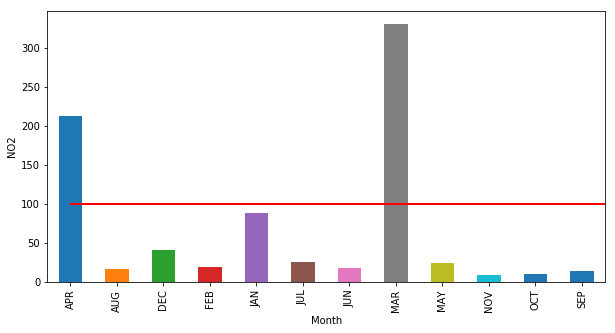

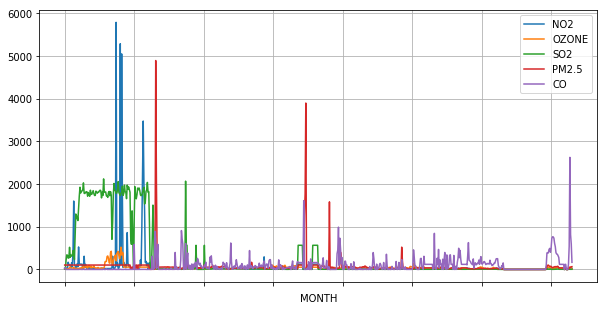

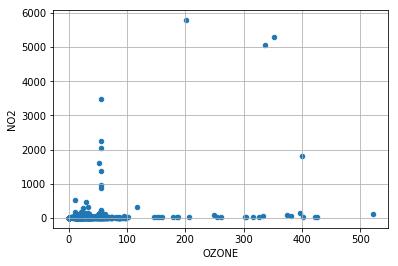

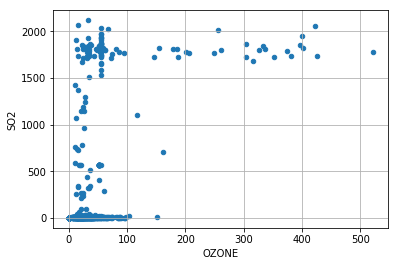

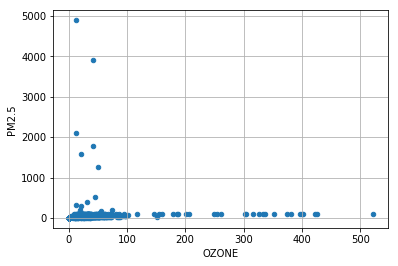

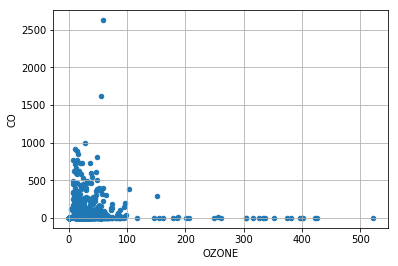

In [28]:
class data_plot:

#Bar plot with threshold line(refers to the mean of avearge value)

    def visualize_on_parameter(self, parameter):
        if parameter=="OZONE":
            df.groupby('MONTH')['OZONE'].mean().plot.bar(figsize=(10,5))
            plt.hlines(y=100,xmin=0, xmax=20, linewidth=2, color='r')
            plt.xlabel("Month")
            plt.ylabel("OZONE")
        elif parameter=="SO2":
            df.groupby('MONTH')['SO2'].mean().plot.bar(figsize=(10,5))
            plt.hlines(y=100,xmin=0, xmax=20, linewidth=2, color='r')
            plt.xlabel("Month")
            plt.ylabel("SO2")
        elif parameter=="PM2.5":
            df.groupby('MONTH')['PM2.5'].mean().plot.bar(figsize=(10,5))
            plt.hlines(y=100,xmin=0, xmax=20, linewidth=2, color='r')
            plt.xlabel("Month")
            plt.ylabel("PM2.5")
        elif parameter == "NO2":
            df.groupby('MONTH')['NO2'].mean().plot.bar(figsize=(10,5))
            plt.hlines(y=100,xmin=0, xmax=20, linewidth=2, color='r')
            plt.xlabel("Month")
            plt.ylabel("NO2")
        elif parameter =="CO":
            df.groupby('MONTH')['CO'].mean().plot.bar(figsize=(10,5))
            plt.hlines(y=100,xmin=0, xmax=20, linewidth=2, color='r')
            plt.xlabel("Month")
            plt.ylabel("CO")

#Line chart            
    def overall_parameter_variation(self):
        df.plot(x="MONTH", y=['NO2','OZONE','SO2','PM2.5','CO'] ,figsize=(10,5), grid=True)
        
#scatter plot
    def correlation_plot(self):
        df.plot.scatter(x="OZONE", y="NO2" , grid=True)
        df.plot.scatter(x="OZONE", y="SO2",grid=True)
        df.plot.scatter(x="OZONE", y="PM2.5",grid=True)
        df.plot.scatter(x="OZONE", y="CO",grid=True)
a=data_plot()
a.visualize_on_parameter("NO2")
a.overall_parameter_variation()
a.correlation_plot()

In [6]:
data.head()


,DAY_NUMBER,MONTH,MONTH_NUM,DATE1,CO,OZONE,NO2,SO2,PM2.5,Temp,COAqi,OzoneAqi,NO2Aqi,SO2Aqi,PM2.5Aqi,Avg,Classify
0,1,JAN,1,2015-01-01 00:00,30.19,18.88,25.89,12.38,102.95,26.61,455.400588,18.88,32.3625,15.475000,102.558434,38.058,0
1,2,JAN,1,2015-01-02 00:00,38.10,15.08,15.63,9.89,102.95,49.85,455.400588,15.08,19.5375,12.362500,102.558434,36.330,0
2,3,JAN,1,2015-01-03 00:00,0.01,21.66,29.23,217.20,102.95,84.76,0.500000,21.66,36.5375,138.696523,102.558434,74.210,0
3,4,JAN,1,2015-01-04 00:00,0.06,15.30,28.98,341.69,102.95,82.17,3.000000,15.30,36.2250,173.152031,102.558434,97.796,0
4,5,JAN,1,2015-01-05 00:00,0.02,15.55,28.51,333.36,102.95,82.09,1.000000,15.55,35.6375,170.846509,102.558434,96.078,0


In [46]:
x=df.iloc[:,10:15].values
x
y=df.iloc[:,-1].values
#Train Test split
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)


In [63]:
class predictor:


    def split(self):
        x=df.iloc[:,10:15].values
    
        y=df.iloc[:,-1].values
        X=x.astype(int)
        Y=y.astype(int)
        from sklearn.cross_validation import train_test_split
        X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=0) #random_state=0 to keep the same data as train and test all the time)

#Feature Scaling
        from sklearn.preprocessing import StandardScaler
        sc=StandardScaler() #Linear regression takes cae of this must define explicitly for KNN
        X_train=sc.fit_transform(X_train) #Use only for training data,Create an object that will be ready to fit our data, transform data according to the fit model
        X_test=sc.transform(X_test)
        return X_train,X_test,y_test,y_train
    def KNN(self):
        X_train,X_test,y_test,y_train=self.split()
        from sklearn.neighbors import KNeighborsClassifier
        knnclassifier = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2) #k=5 , p=2 => Equilidian distance,p=power parameter, p=1 => ???
        knnclassifier.fit(X_train,y_train) #make machine learn from the training data
        y_pred=knnclassifier.predict(X_test)
        return y_pred
    def DT(self):
        X_train,X_test,y_test,y_train=self.split()
        from sklearn.tree import DecisionTreeClassifier
        dtclassifier = DecisionTreeClassifier(criterion='entropy',random_state=0) #entropy and information gain
        dtclassifier.fit(X_train,y_train)
        y_pred=dtclassifier.predict(X_test)
        return y_pred #make machine learn from the training data
    def NB(self):
        X_train,X_test,y_test,y_train=self.split()
        from sklearn.naive_bayes import GaussianNB
        nbclassifier=GaussianNB() #NB uses Gaussian Distribution
        nbclassifier.fit(X_train,y_train) #make machine learn from the training data
        y_pred=nbclassifier.predict(X_test)
        return y_pred

    def confusion_matrix(self):
        #y_pred=self.KNN()
        #y_pred=self.DT()
        y_pred=self.NB()
        X_train,X_test,y_test,y_train=self.split()
        from sklearn.metrics import confusion_matrix
        cm=confusion_matrix(y_test,y_pred)
        Total = cm[0,0]+ cm[0,1]+cm[1,0]+ cm[1,1]
        acc=(cm[0,0]+cm[1,1])/Total
        return acc
    
p=predictor()
#p.KNN()
#p.KNN()
#p.DT()
#p.RF()
p.NB()
print(p.confusion_matrix())

1.0


c:\python3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [59]:
import random

class random_pollutant:
    def random_pollutants(self):
        pollutants_list=['CO','PM2.5','SO2','NO2','OZONE']
        iter=0
        absurd_ranges=[]
        absurd_month=[]
        while iter<=4:
            ran_num=random.randint(0,4)
            selected_pollutant=pollutants_list[ran_num]
            lower_limit=random.randint(int(min(df[selected_pollutant])),int(max(df[selected_pollutant])))
            upper_limit=random.randint(int(min(df[selected_pollutant])),int(max(df[selected_pollutant])))
            if selected_pollutant=='CO':
                for i in pollutants_list:
                    if i!='CO':
                        subset1=df.loc[df[i]>lower_limit]
                        subset2=subset1.loc[df[i]<upper_limit]
                        subset2_mean=subset2[[i]].mean()
                        if float(subset2_mean)>(1.25*int(df[[i]].mean())):
                            temp=[lower_limit,upper_limit]
                            absurd_ranges.append(temp)
                            for idx,val in subset2["MONTH"].iteritems():
                                if val not in absurd_month:
                                    absurd_month.append(val)
                            print("######################################################################")
                            print("For these range of CO " + str(i) + " is higher than normal",absurd_ranges)
                            print("The range selected for " + str(i) + " from " + str(subset2[i].min()) +" to",subset2[i].max())
                            print("Between these month " + str(i) + " is abnormally high",absurd_month)
            elif selected_pollutant=='OZONE':
                for i in pollutants_list:
                    if i!='OZONE':
                        subset1=data.loc[df[i]>lower_limit]
                        subset2=subset1.loc[df[i]<upper_limit]
                        subset2_mean=subset2[[i]].mean()
                        if float(subset2_mean)>(1.25*int(df[[i]].mean())):
                            temp=[lower_limit,upper_limit]
                            absurd_ranges.append(temp)
                            for idx,val in subset2["MONTH"].iteritems():
                                if val not in absurd_month:
                                    absurd_month.append(val)
                            print("######################################################################")
                            print("For these range of OZONE " + str(i) + " is higher than normal",absurd_ranges)
                            print("The range selected for " + str(i) + " from " + str(subset2[i].min()) +" to",subset2[i].max())
                            print("Between these month " + str(i) + " is abnormally high",absurd_month)
            elif selected_pollutant=='NO2':
                for i in pollutants_list:
                    if i!='NO2':
                        subset1=df.loc[df[i]>lower_limit]
                        subset2=subset1.loc[df[i]<upper_limit]
                        subset2_mean=subset2[[i]].mean()
                        if float(subset2_mean)>(1.25*int(df[[i]].mean())):
                            temp=[lower_limit,upper_limit]
                            absurd_ranges.append(temp)
                            for idx,val in subset2["MONTH"].iteritems():
                                if val not in absurd_month:
                                    absurd_month.append(val)
                            print("######################################################################")
                            print("For these range of NO2 " + str(i) + " is higher than normal",absurd_ranges)
                            print("The range selected for " + str(i) + " from " + str(subset2[i].min()) +" to",subset2[i].max())
                            print("Between these month " + str(i) + " is abnormally high",absurd_month)
            elif selected_pollutant=='SO2':
                for i in pollutants_list:
                    if i!='SO2':
                        subset1=data.loc[df[i]>lower_limit]
                        subset2=subset1.loc[df[i]<upper_limit]
                        subset2_mean=subset2[[i]].mean()
                        if float(subset2_mean)>(1.25*int(df[[i]].mean())):
                            temp=[lower_limit,upper_limit]
                            absurd_ranges.append(temp)
                            for idx,val in subset2["MONTH"].iteritems():
                                if val not in absurd_month:
                                    absurd_month.append(val)
                            print("######################################################################")
                            print("For these range of SO2 " + str(i) + " is higher than normal",absurd_ranges)
                            print("The range selected for " + str(i) + " from " + str(subset2[i].min()) +" to",subset2[i].max())
                            print("Between these month " + str(i) + " is abnormally high",absurd_month)
    
            elif selected_pollutant=='PM2.5':
                for i in pollutants_list:
                    if i!='PM2.5':
                        subset1=data.loc[df[i]>lower_limit]
                        subset2=subset1.loc[df[i]<upper_limit]
                        subset2_mean=subset2[[i]].mean()
                        if float(subset2_mean)>(1.25*int(df[[i]].mean())):
                            temp=[lower_limit,upper_limit]
                            absurd_ranges.append(temp)
                            for idx,val in subset2["MONTH"].iteritems():
                                if val not in absurd_month:
                                    absurd_month.append(val)
                            print("########################################################################")
                            print("The pollutant selected pollutant is",i)
                            print("For these range of PM2.5 " + str(i) + " is higher than normal",absurd_ranges)
                            print("The range selected for " + str(i) + " from " + str(subset2[i].min()) +" to",subset2[i].max())
                            print("Between these month " + str(i) + " is abnormally high",absurd_month)
            
            iter+=1
r=random_pollutant()
r.random_pollutants()

######################################################################
For these range of NO2 CO is higher than normal [[4, 1545]]
The range selected for CO from 4.02 to 990.36
Between these month CO is abnormally high ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
########################################################################
The pollutant selected pollutant is CO
For these range of PM2.5 CO is higher than normal [[4, 1545], [2390, 3290]]
The range selected for CO from 2624.61 to 2624.61
Between these month CO is abnormally high ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
######################################################################
For these range of OZONE CO is higher than normal [[4, 1545], [2390, 3290], [197, 480]]
The range selected for CO from 198.43 to 468.8
Between these month CO is abnormally high ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC'